In [ ]:
!pip install kaggle

!mkdir ~/.kaggle

!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d 'dansbecker/food-101'

Dataset URL: https://www.kaggle.com/datasets/dansbecker/food-101
License(s): other
100% 9.37G/9.38G [01:39<00:00, 171MB/s]
100% 9.38G/9.38G [01:39<00:00, 101MB/s]


In [ ]:
!unzip /content/food-101.zip

Streaming output truncated to the last 5000 lines.
  inflating: food-101/food-101/images/tacos/1030289.jpg  
  inflating: food-101/food-101/images/tacos/1033196.jpg  
  inflating: food-101/food-101/images/tacos/1036030.jpg  
  inflating: food-101/food-101/images/tacos/1042175.jpg  
  inflating: food-101/food-101/images/tacos/1044043.jpg  
  inflating: food-101/food-101/images/tacos/1058697.jpg  
  inflating: food-101/food-101/images/tacos/1059239.jpg  
  inflating: food-101/food-101/images/tacos/1059326.jpg  
  inflating: food-101/food-101/images/tacos/1066762.jpg  
  inflating: food-101/food-101/images/tacos/1070967.jpg  
  inflating: food-101/food-101/images/tacos/1073468.jpg  
  inflating: food-101/food-101/images/tacos/1075296.jpg  
  inflating: food-101/food-101/images/tacos/1085243.jpg  
  inflating: food-101/food-101/images/tacos/108529.jpg  
  inflating: food-101/food-101/images/tacos/1086014.jpg  
  inflating: food-101/food-101/images/tacos/108945.jpg  
  inflating: food-101/f

In [ ]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [ ]:
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/food-101/__MACOSX/food-101/images/fish_and_chips/._1897694.jpg
/content/food-101/__MACOSX/food-101/images/fish_and_chips/._847753.jpg
/content/food-101/__MACOSX/food-101/images/fish_and_chips/._1961695.jpg
/content/food-101/__MACOSX/food-101/images/fish_and_chips/._2799763.jpg
/content/food-101/__MACOSX/food-101/images/fish_and_chips/._1445155.jpg
/content/food-101/__MACOSX/food-101/images/fish_and_chips/._529653.jpg
/content/food-101/__MACOSX/food-101/images/fish_and_chips/._2434306.jpg
/content/food-101/__MACOSX/food-101/images/fish_and_chips/._710495.jpg
/content/food-101/__MACOSX/food-101/images/fish_and_chips/._3222017.jpg
/content/food-101/__MACOSX/food-101/images/fish_and_chips/._556207.jpg
/content/food-101/__MACOSX/food-101/images/fish_and_chips/._3388814.jpg
/content/food-101/__MACOSX/food-101/images/fish_and_chips/._1720941.jpg
/content/food-101/__MACOSX/food-101/images/fish_and_chips/._463240.jpg
/content/food-101/

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.15.0


In [ ]:
import splitfolders
splitfolders.ratio('/content/food-101/images', output="output", seed=1337, ratio=(.2, .2,.6), group_prefix=None)

ModuleNotFoundError: No module named 'splitfolders'

In [ ]:
!pip install split-folders[full]


In [ ]:
import splitfolders
splitfolders.ratio('/content/food-101/food-101/images', output="/content/Train_Test_split", seed=1337, ratio=(.2, .2,.6), group_prefix=None)


Copying files: 0 files [00:00, ? files/s]
Copying files: 405 files [00:00, 4041.88 files/s]
Copying files: 810 files [00:00, 3939.85 files/s]
Copying files: 1205 files [00:00, 1518.63 files/s]
Copying files: 1459 files [00:01, 1160.36 files/s]
Copying files: 1642 files [00:01, 1082.84 files/s]
Copying files: 1791 files [00:01, 1105.12 files/s]
Copying files: 1946 files [00:01, 1184.75 files/s]
Copying files: 2090 files [00:01, 1227.84 files/s]
Copying files: 2277 files [00:01, 1373.07 files/s]
Copying files: 2508 files [00:01, 1601.59 files/s]
Copying files: 2868 files [00:01, 2118.98 files/s]
Copying files: 3103 files [00:01, 1994.84 files/s]
Copying files: 3354 files [00:02, 2128.33 files/s]
Copying files: 3628 files [00:02, 2292.22 files/s]
Copying files: 3904 files [00:02, 2421.77 files/s]
Copying files: 4213 files [00:02, 2612.24 files/s]
Copying files: 4646 files [00:02, 3107.21 files/s]
Copying files: 5001 files [00:02, 3160.25 files/s]
Copying files: 5322 files [00:03, 1248.26

In [ ]:
# Create a list with the filepaths for training and testing
train_dir = Path('/content/Train_Test_split/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [ ]:
test_dir = Path('/content/Train_Test_split/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [ ]:
val_dir = Path('/content/Train_Test_split/val')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [ ]:

def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

In [ ]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [ ]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 20200

Number of different labels: 101

Labels: ['pad_thai' 'baby_back_ribs' 'apple_pie' 'creme_brulee' 'chocolate_cake'
 'prime_rib' 'deviled_eggs' 'tiramisu' 'mussels' 'chicken_quesadilla'
 'crab_cakes' 'chicken_wings' 'croque_madame' 'fried_calamari' 'nachos'
 'huevos_rancheros' 'pizza' 'cheese_plate' 'hummus' 'sashimi'
 'peking_duck' 'club_sandwich' 'donuts' 'gyoza' 'guacamole' 'samosa'
 'seaweed_salad' 'spaghetti_carbonara' 'paella' 'lobster_roll_sandwich'
 'fish_and_chips' 'filet_mignon' 'beignets' 'spaghetti_bolognese'
 'bruschetta' 'shrimp_and_grits' 'takoyaki' 'risotto' 'caesar_salad'
 'poutine' 'grilled_salmon' 'red_velvet_cake' 'baklava' 'greek_salad'
 'pork_chop' 'cannoli' 'onion_rings' 'hot_and_sour_soup' 'hamburger'
 'frozen_yogurt' 'lobster_bisque' 'omelette' 'dumplings'
 'breakfast_burrito' 'bibimbap' 'miso_soup' 'falafel' 'chocolate_mousse'
 'edamame' 'french_onion_soup' 'bread_pudding' 'ravioli' 'foie_gras' 'pho'
 'french_fries'

In [ ]:
train_df.head(5)

Filepath           Label
0  /content/Train_Test_split/train/pad_thai/27267...        pad_thai
1  /content/Train_Test_split/train/baby_back_ribs...  baby_back_ribs
2  /content/Train_Test_split/train/apple_pie/1939...       apple_pie
3  /content/Train_Test_split/train/creme_brulee/2...    creme_brulee
4  /content/Train_Test_split/train/chocolate_cake...  chocolate_cake

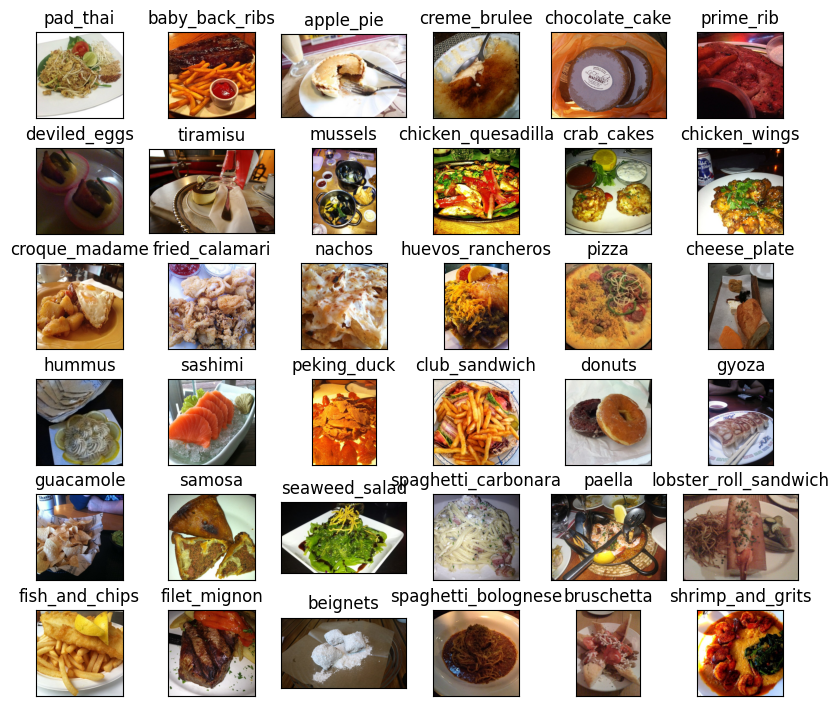

In [ ]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 20200 validated image filenames belonging to 101 classes.


In [ ]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 60600 validated image filenames belonging to 101 classes.


In [ ]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 60600 validated image filenames belonging to 101 classes.


In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(101, activation='softmax')(x)  # Change 36 to 101

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
632/632 [==============================] - 4114s 7s/step - loss: 2.8707 - accuracy: 0.3095 - val_loss: 2.2364 - val_accuracy: 0.4319
Epoch 2/5
632/632 [==============================] - 3614s 6s/step - loss: 1.9494 - accuracy: 0.5001 - val_loss: 2.0418 - val_accuracy: 0.4807
Epoch 3/5
632/632 [==============================] - 3223s 5s/step - loss: 1.6413 - accuracy: 0.5610 - val_loss: 2.0102 - val_accuracy: 0.4914
Epoch 4/5
632/632 [==============================] - 3267s 5s/step - loss: 1.4167 - accuracy: 0.6165 - val_loss: 2.0435 - val_accuracy: 0.4955
Epoch 5/5
632/632 [==============================] - 3132s 5s/step - loss: 1.2337 - accuracy: 0.6576 - val_loss: 2.0992 - val_accuracy: 0.4918


In [ ]:
model.save('FV.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

1894/1894 [==============================] - 2701s 1s/step


['cheesecake',
 'waffles',
 'pad_thai',
 'macarons',
 'huevos_rancheros',
 'grilled_salmon',
 'pulled_pork_sandwich',
 'dumplings',
 'tiramisu',
 'apple_pie',
 'club_sandwich',
 'spaghetti_carbonara',
 'strawberry_shortcake',
 'hot_dog',
 'eggs_benedict',
 'breakfast_burrito',
 'cup_cakes',
 'spring_rolls',
 'takoyaki',
 'beignets',
 'crab_cakes',
 'macaroni_and_cheese',
 'dumplings',
 'fish_and_chips',
 'grilled_salmon',
 'strawberry_shortcake',
 'huevos_rancheros',
 'frozen_yogurt',
 'frozen_yogurt',
 'deviled_eggs',
 'miso_soup',
 'beef_carpaccio',
 'lobster_roll_sandwich',
 'paella',
 'guacamole',
 'ravioli',
 'fried_calamari',
 'churros',
 'ice_cream',
 'grilled_salmon',
 'spring_rolls',
 'bibimbap',
 'cannoli',
 'shrimp_and_grits',
 'prime_rib',
 'churros',
 'grilled_cheese_sandwich',
 'churros',
 'risotto',
 'breakfast_burrito',
 'eggs_benedict',
 'clam_chowder',
 'peking_duck',
 'croque_madame',
 'churros',
 'fish_and_chips',
 'spaghetti_carbonara',
 'pho',
 'eggs_benedict',
 '

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [ ]:
img = output('/content/Train_Test_split/test/french_onion_soup/1051462.jpg')
img

1/1 [==============================] - 2s 2s/step


'french_onion_soup'

In [13]:
!pip install streamlit
import streamlit as st
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from keras.models import load_model
import requests
from bs4 import BeautifulSoup

model = load_model('FV.h5')
labels = {
    0: "Apple pie",
    1: "Baby back ribs",
    2: "Baklava",
    3: "Beef carpaccio",
    4: "Beef tartare",
    5: "Beet salad",
    6: "Beignets",
    7: "Bibimbap",
    8: "Bread pudding",
    9: "Breakfast burrito",
    10: "Bruschetta",
    11: "Caesar salad",
    12: "Cannoli",
    13: "Caprese salad",
    14: "Carrot cake",
    15: "Ceviche",
    16: "Cheesecake",
    17: "Cheese plate",
    18: "Chicken curry",
    19: "Chicken quesadilla",
    20: "Chicken wings",
    21: "Chocolate cake",
    22: "Chocolate mousse",
    23: "Churros",
    24: "Clam chowder",
    25: "Club sandwich",
    26: "Crab cakes",
    27: "Creme brulee",
    28: "Croque madame",
    29: "Cup cakes",
    30: "Deviled eggs",
    31: "Donuts",
    32: "Dumplings",
    33: "Edamame",
    34: "Eggs benedict",
    35: "Escargots",
    36: "Falafel",
    37: "Filet mignon",
    38: "Fish and chips",
    39: "Foie gras",
    40: "French fries",
    41: "French onion soup",
    42: "French toast",
    43: "Fried calamari",
    44: "Fried rice",
    45: "Frozen yogurt",
    46: "Garlic bread",
    47: "Gnocchi",
    48: "Greek salad",
    49: "Grilled cheese sandwich",
    50: "Grilled salmon",
    51: "Guacamole",
    52: "Gyoza",
    53: "Hamburger",
    54: "Hot and sour soup",
    55: "Hot dog",
    56: "Huevos rancheros",
    57: "Hummus",
    58: "Ice cream",
    59: "Lasagna",
    60: "Lobster bisque",
    61: "Lobster roll sandwich",
    62: "Macaroni and cheese",
    63: "Macarons",
    64: "Miso soup",
    65: "Mussels",
    66: "Nachos",
    67: "Omelette",
    68: "Onion rings",
    69: "Oysters",
    70: "Pad thai",
    71: "Paella",
    72: "Pancakes",
    73: "Panna cotta",
    74: "Peking duck",
    75: "Pho",
    76: "Pizza",
    77: "Pork chop",
    78: "Poutine",
    79: "Prime rib",
    80: "Pulled pork sandwich",
    81: "Ramen",
    82: "Ravioli",
    83: "Red velvet cake",
    84: "Risotto",
    85: "Samosa",
    86: "Sashimi",
    87: "Scallops",
    88: "Seaweed salad",
    89: "Shrimp and grits",
    90: "Spaghetti bolognese",
    91: "Spaghetti carbonara",
    92: "Spring rolls",
    93: "Steak",
    94: "Strawberry shortcake",
    95: "Sushi",
    96: "Tacos",
    97: "Takoyaki",
    98: "Tiramisu",
    99: "Tuna tartare",
    100: "Waffles"
}


vegetables = [
    "Apple pie",
    "Baby back ribs",
    "Baklava",
    "Beef carpaccio",
    "Beef tartare",
    "Beet salad",
    "Beignets",
    "Bibimbap",
    "Bread pudding",
    "Breakfast burrito",
    "Bruschetta",
    "Caesar salad",
    "Cannoli",
    "Caprese salad",
    "Carrot cake",
    "Ceviche",
    "Cheesecake",
    "Cheese plate",
    "Chicken curry",
    "Chicken quesadilla",
    "Chicken wings",
    "Chocolate cake",
    "Chocolate mousse",
    "Churros",
    "Clam chowder",
    "Club sandwich",
    "Crab cakes",
    "Creme brulee",
    "Croque madame",
    "Cup cakes",
    "Deviled eggs",
    "Donuts",
    "Dumplings",
    "Edamame",
    "Eggs benedict",
    "Escargots",
    "Falafel",
    "Filet mignon",
    "Fish and chips",
    "Foie gras",
    "French fries",
    "French onion soup",
    "French toast",
    "Fried calamari",
    "Fried rice",
    "Frozen yogurt",
    "Garlic bread",
    "Gnocchi",
    "Greek salad",
    "Grilled cheese sandwich",
    "Grilled salmon",
    "Guacamole",
    "Gyoza",
    "Hamburger",
    "Hot and sour soup",
    "Hot dog",
    "Huevos rancheros",
    "Hummus",
    "Ice cream",
    "Lasagna",
    "Lobster bisque",
    "Lobster roll sandwich",
    "Macaroni and cheese",
    "Macarons",
    "Miso soup",
    "Mussels",
    "Nachos",
    "Omelette",
    "Onion rings",
    "Oysters",
    "Pad thai",
    "Paella",
    "Pancakes",
    "Panna cotta",
    "Peking duck",
    "Pho",
    "Pizza",
    "Pork chop",
    "Poutine",
    "Prime rib",
    "Pulled pork sandwich",
    "Ramen",
    "Ravioli",
    "Red velvet cake",
    "Risotto",
    "Samosa",
    "Sashimi",
    "Scallops",
    "Seaweed salad",
    "Shrimp and grits",
    "Spaghetti bolognese",
    "Spaghetti carbonara",
    "Spring rolls",
    "Steak",
    "Strawberry shortcake",
    "Sushi",
    "Tacos",
    "Takoyaki",
    "Tiramisu",
    "Tuna tartare",
    "Waffles"
]

def fetch_calories(prediction):
    try:
        url = 'https://www.google.com/search?&q=calories in ' + prediction
        req = requests.get(url).text
        scrap = BeautifulSoup(req, 'html.parser')
        calories = scrap.find("div", class_="BNeawe iBp4i AP7Wnd").text
        return calories
    except Exception as e:
        st.error("Can't able to fetch the Calories")
        print(e)


def processed_img(img_path):
    img = load_img(img_path, target_size=(224, 224, 3))
    img = img_to_array(img)
    img = img / 255
    img = np.expand_dims(img, [0])
    answer = model.predict(img)
    y_class = answer.argmax(axis=-1)
    print(y_class)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    print(res)
    return res.capitalize()


def run():
    st.title("Vegetable🍅 Classification")
    img_file = st.file_uploader("Choose an Image", type=["jpg", "png"])
    if img_file is not None:
        img = Image.open(img_file).resize((250, 250))
        st.image(img, use_column_width=False)
        save_image_path = './upload_images/' + img_file.name
        with open(save_image_path, "wb") as f:
            f.write(img_file.getbuffer())

        # if st.button("Predict"):
        if img_file is not None:
            result = processed_img(save_image_path)
            print(result)
            if result in vegetables:
                st.info('**Category : Vegetables**')
            else:
                st.info('**Category : Unknown**')
            st.success("**Predicted : " + result + '**')
            cal = fetch_calories(result)
            if cal:
                st.warning('**' + cal + '(100 grams)**')


run()
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.144.212:8501

  Stopping...
^C
